# Interview Coding session
__NAEP Doctoral Student Internship Program__

_Candidate: Congning Ni_

_Date: March 4th, 2024_

In [52]:
# library
import pandas as pd
import seaborn as sns
import swifter

import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import math
from collections import Counter

In [30]:
## Import dataset
sample_df = pd.read_csv('./Data/data_subset.csv')

## Tasks
### Data Cleaning (5 minutes)

- Write a function that cleans a given text:
  - Remove any non-alphabetic characters (e.g., numbers, special characters).
  - Convert the sentence to lowercase.


In [31]:
def data_cleaning(evidence):
    evidence = evidence.lower()
    evidence = re.sub('[^a-z]+', ' ', evidence)
    return evidence

In [41]:
sample_df['clean_evidence'] = sample_df['evidence'].swifter.apply(lambda x: data_cleaning(x))
print('[Original sample evidence]:\n\t', sample_df['evidence'][0])
print('')
print('[Cleaned sample evidence]:\n\t', sample_df['clean_evidence'][0])


[Original sample evidence]:
	 Population planning that is intended to reduce population size or growth rate may promote or enforce one or more of the following practices, although there are other methods as well: Greater and better access to contraception Reducing infant mortality so that parents do not need to have many children to ensure at least some survive to adulthood.

[Cleaned sample evidence]:
	 population planning that is intended to reduce population size or growth rate may promote or enforce one or more of the following practices although there are other methods as well greater and better access to contraception reducing infant mortality so that parents do not need to have many children to ensure at least some survive to adulthood 


### Text Preprocessing (5 minutes)

- Extend the cleaning function to include:
   - **Tokenization:** Split the sentence into words.
  - **Stopword Removal:** Remove common stopwords.
  - **Lemmatization:** Convert words to their base form.

In [71]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def text_process(text):
    text_list = text.split()
    text_nostop = [word for word in text_list if word not in stop_words]
    text_lemma = [lemmatizer.lemmatize(word) for word in text_nostop]
    return " ".join(text_lemma)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/congningni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
sample_df['process_evidence'] = sample_df['clean_evidence'].swifter.apply(lambda x: text_process(x))

print('[Original sample evidence]:\n\t', sample_df['evidence'][0])
print('')
print('[Processed sample evidence]:\n\t', sample_df['process_evidence'][0])


Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

[Original sample evidence]:
	 Population planning that is intended to reduce population size or growth rate may promote or enforce one or more of the following practices, although there are other methods as well: Greater and better access to contraception Reducing infant mortality so that parents do not need to have many children to ensure at least some survive to adulthood.

[Processed sample evidence]:
	 population planning intended reduce population size growth rate may promote enforce one following practice although method well greater better access contraception reducing infant mortality parent need many child ensure least survive adulthood


### TF-IDF Practice

**Term Frequency (TF) Calculation (5 minutes):**

- Write a function to calculate the term frequency for each word in a document. The term frequency (TF) is defined as the number of times a term appears in a document divided by the total number of terms in that document.

**Document Frequency (DF) Calculation (5 minutes):**

- Write a function to calculate the document frequency for each word across all documents. The document frequency is the number of documents that contain a specific term.

**Inverse Document Frequency (IDF) Calculation (5 minutes):**

- Use the document frequency from the previous step to calculate the inverse document frequency (IDF) for each word. IDF is calculated as the logarithm of the total number of documents divided by the document frequency of the term. It measures the importance of the term across all documents.

**TF-IDF Vector Construction (10 minutes):**

- Combine the TF and IDF scores to construct the TF-IDF vector for each document. The TF-IDF score for each term in a document is the product of its TF and IDF scores.



#### Using TfidfVectorizer package

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
vec_tdidf = vectorizer.fit_transform(sample_df['process_evidence'])

In [74]:
vec_tdidf.shape

(5000, 500)

#### Using code from scratch


In [75]:
## tf
def term_freq(doc):
    words = doc.split() 
    word_count = Counter(words)
    tf = {word: count / len(words) for word, count in word_count.items()}
    return tf

## df
def doc_freq(docs):
    df = Counter()
    for doc in docs:
        unique_words = set(doc.split()) 
        df.update(unique_words)
    return df

## idf    
def inv_doc_freq(df, total_docs):
    idf = {word: math.log((total_docs + 1) / (freq + 1)) + 1 for word, freq in df.items()}
    return idf
    
## td-idf
def tf_idf_single(doc, idf):
    tf = term_freq(doc)
    tfidf = {word: tf_val * idf[word] for word, tf_val in tf.items()}
    return tfidf


In [76]:
docs = sample_df['process_evidence'].tolist() 
df = doc_freq(docs)
total_docs = len(docs)
idf = inv_doc_freq(df, total_docs)
sample_df['TFIDF_vec'] = sample_df['process_evidence'].apply(lambda doc: tf_idf_single(doc, idf))

In [77]:
sample_df.TFIDF_vec[0]

{'population': 0.34105938505453026,
 'planning': 0.24142605319346402,
 'intended': 0.24712360184327511,
 'reduce': 0.17276278515170718,
 'size': 0.208880619605084,
 'growth': 0.167453440251851,
 'rate': 0.13122728679920898,
 'may': 0.13692483544902007,
 'promote': 0.24712360184327511,
 'enforce': 0.26308690258596235,
 'one': 0.14389807142758912,
 'following': 0.1901064364666799,
 'practice': 0.23243598842934587,
 'although': 0.17334691430833693,
 'method': 0.20227721042798377,
 'well': 0.15110193575920888,
 'greater': 0.17162629627136733,
 'better': 0.21279196782239668,
 'access': 0.22875526856508388,
 'contraception': 0.26308690258596235,
 'reducing': 0.18631390968529657,
 'infant': 0.26308690258596235,
 'mortality': 0.23243598842934587,
 'parent': 0.25409683782184417,
 'need': 0.19682866707970947,
 'many': 0.15168606491583864,
 'child': 0.22875526856508388,
 'ensure': 0.24712360184327511,
 'least': 0.17162629627136733,
 'survive': 0.22875526856508388,
 'adulthood': 0.2630869025859623

## Appendix
_Attached some TFIDF processing i played with yesterday._

In [60]:
df = pd.read_csv('./Data/data_subset.csv')

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from umap import UMAP
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## tfidf
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['claim'].values.astype('U')) 

## umap 
umap_model = UMAP(n_neighbors=15, n_components=2, metric='cosine', random_state=42)
X_umap = umap_model.fit_transform(X_tfidf)

## knn clustering
n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_umap)
df['cluster'] = clusters


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


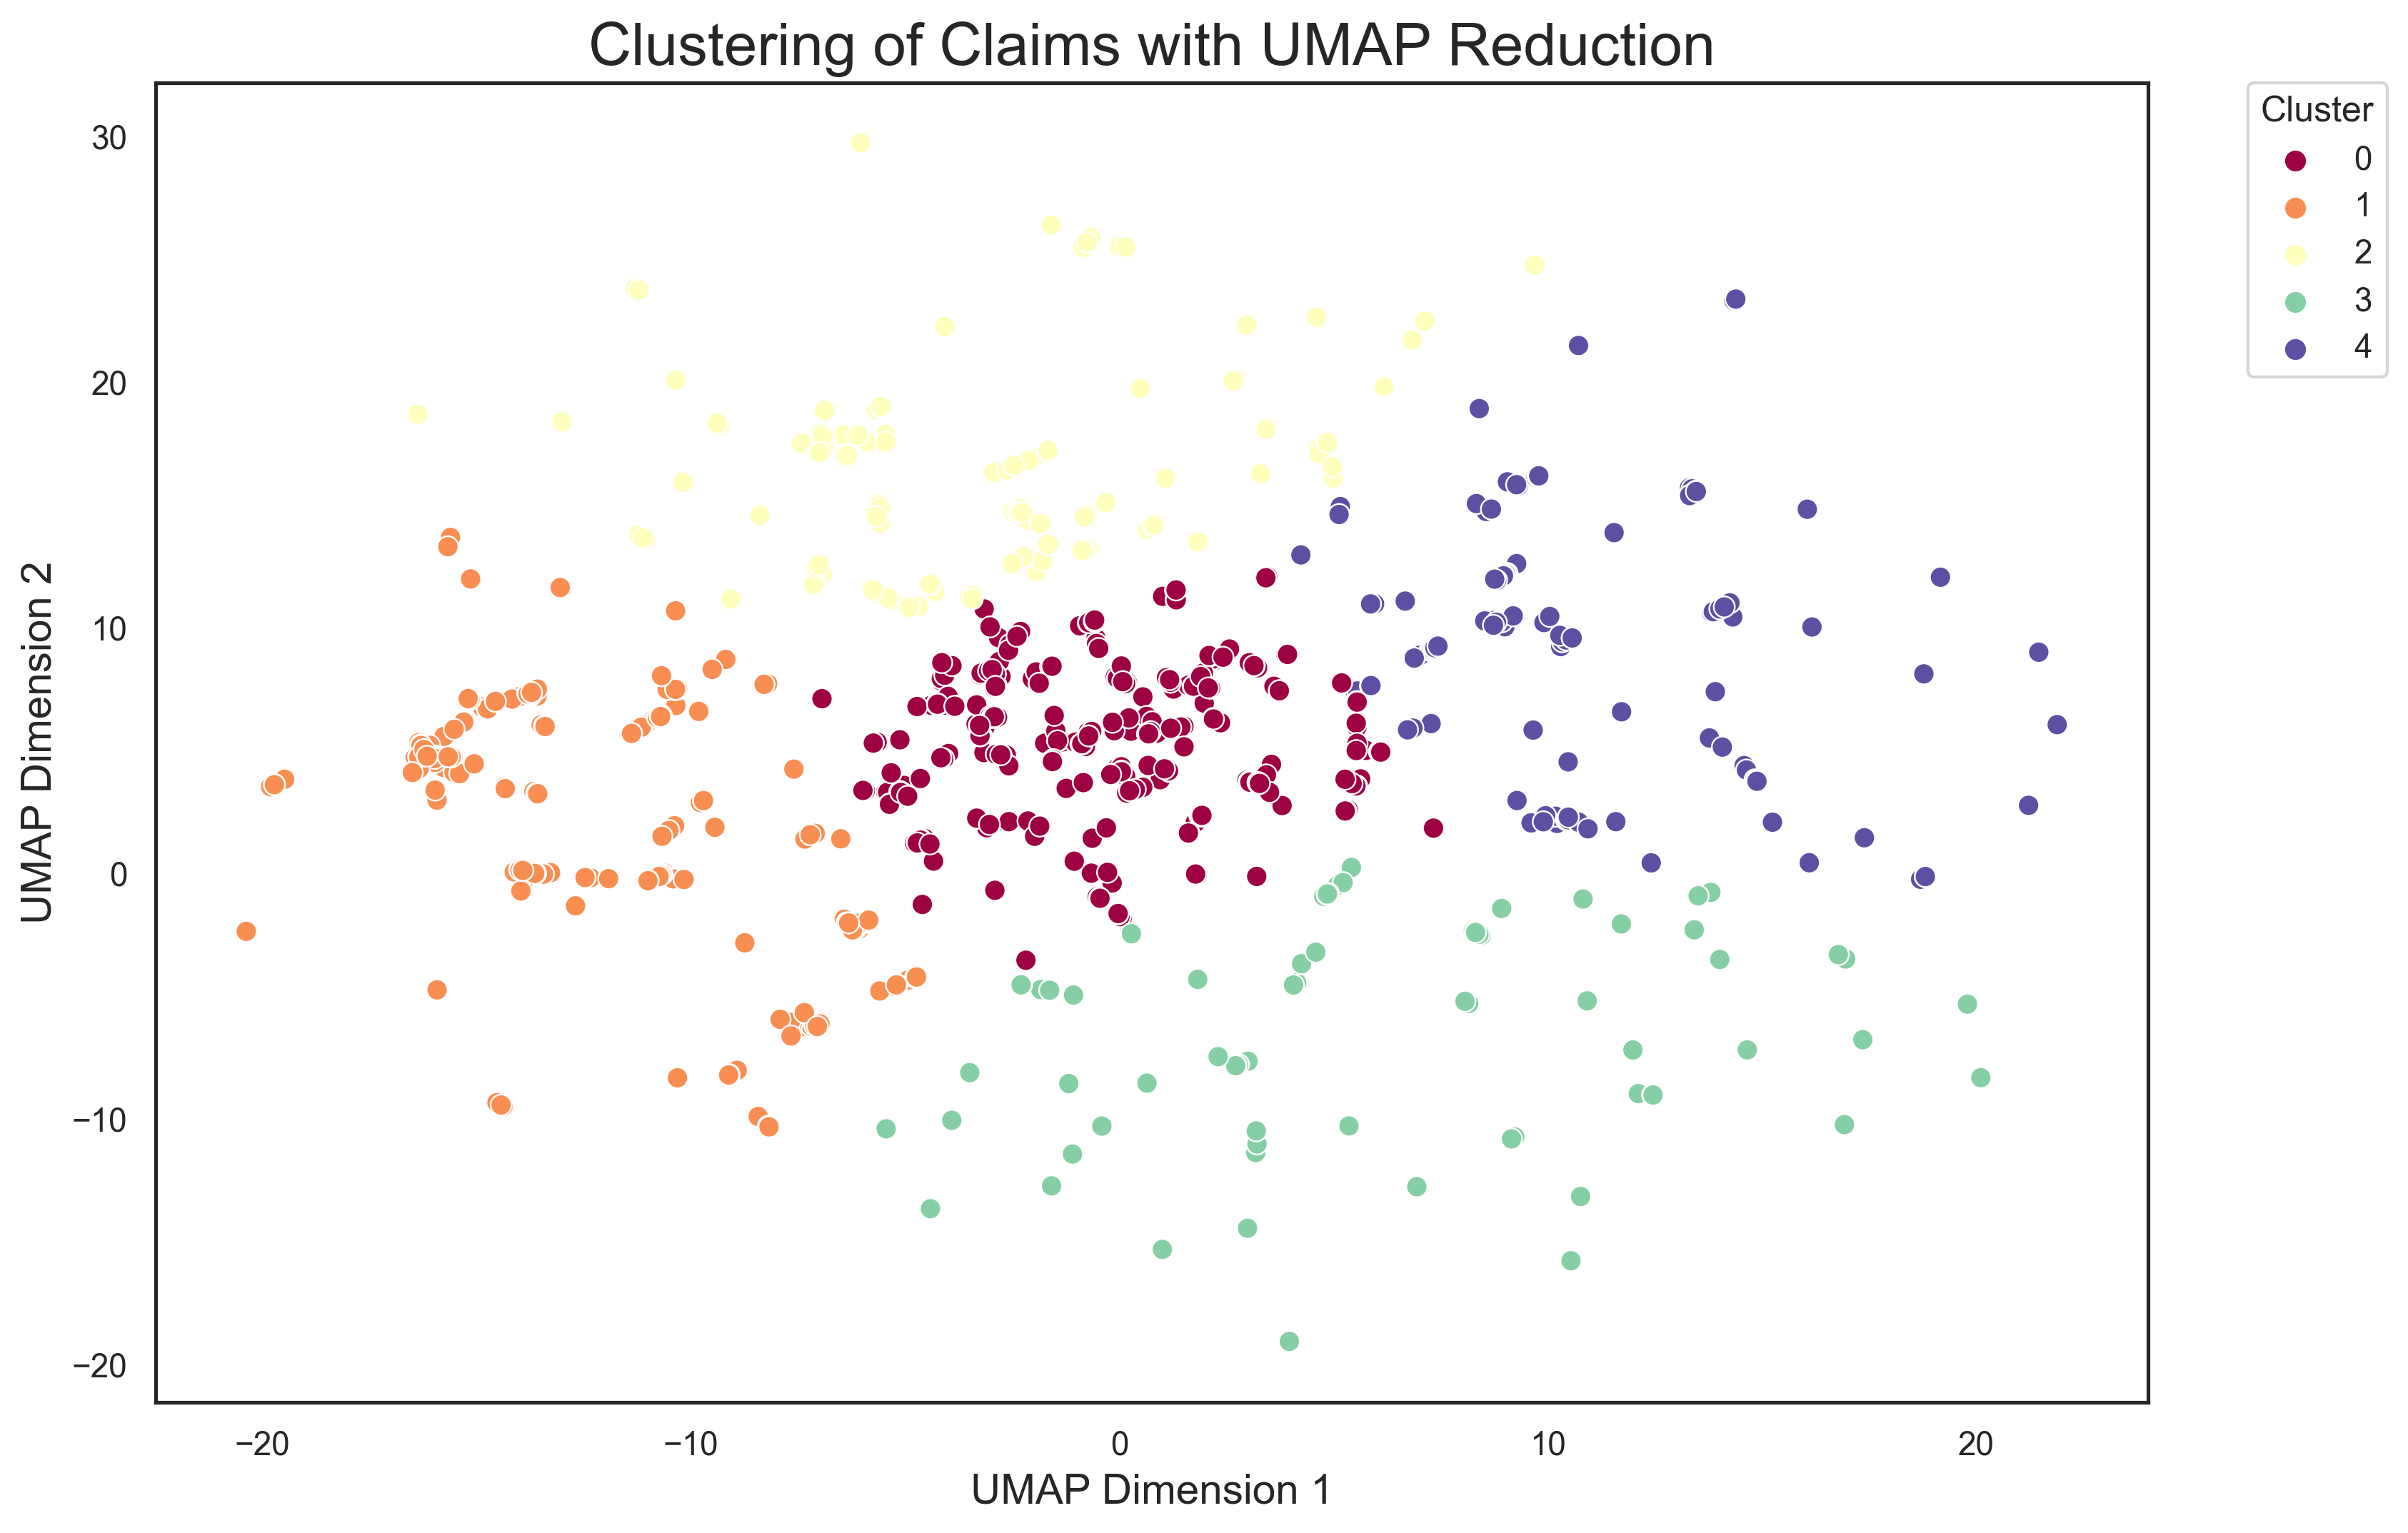

In [62]:
import seaborn as sns

# Step 4: Visualization with Seaborn and including a legend
sns.set(style='white')
plt.figure(figsize=(12, 8),dpi=300)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df['cluster'], palette='Spectral', s=50)
plt.title('Clustering of Claims with UMAP Reduction', fontsize=20)
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


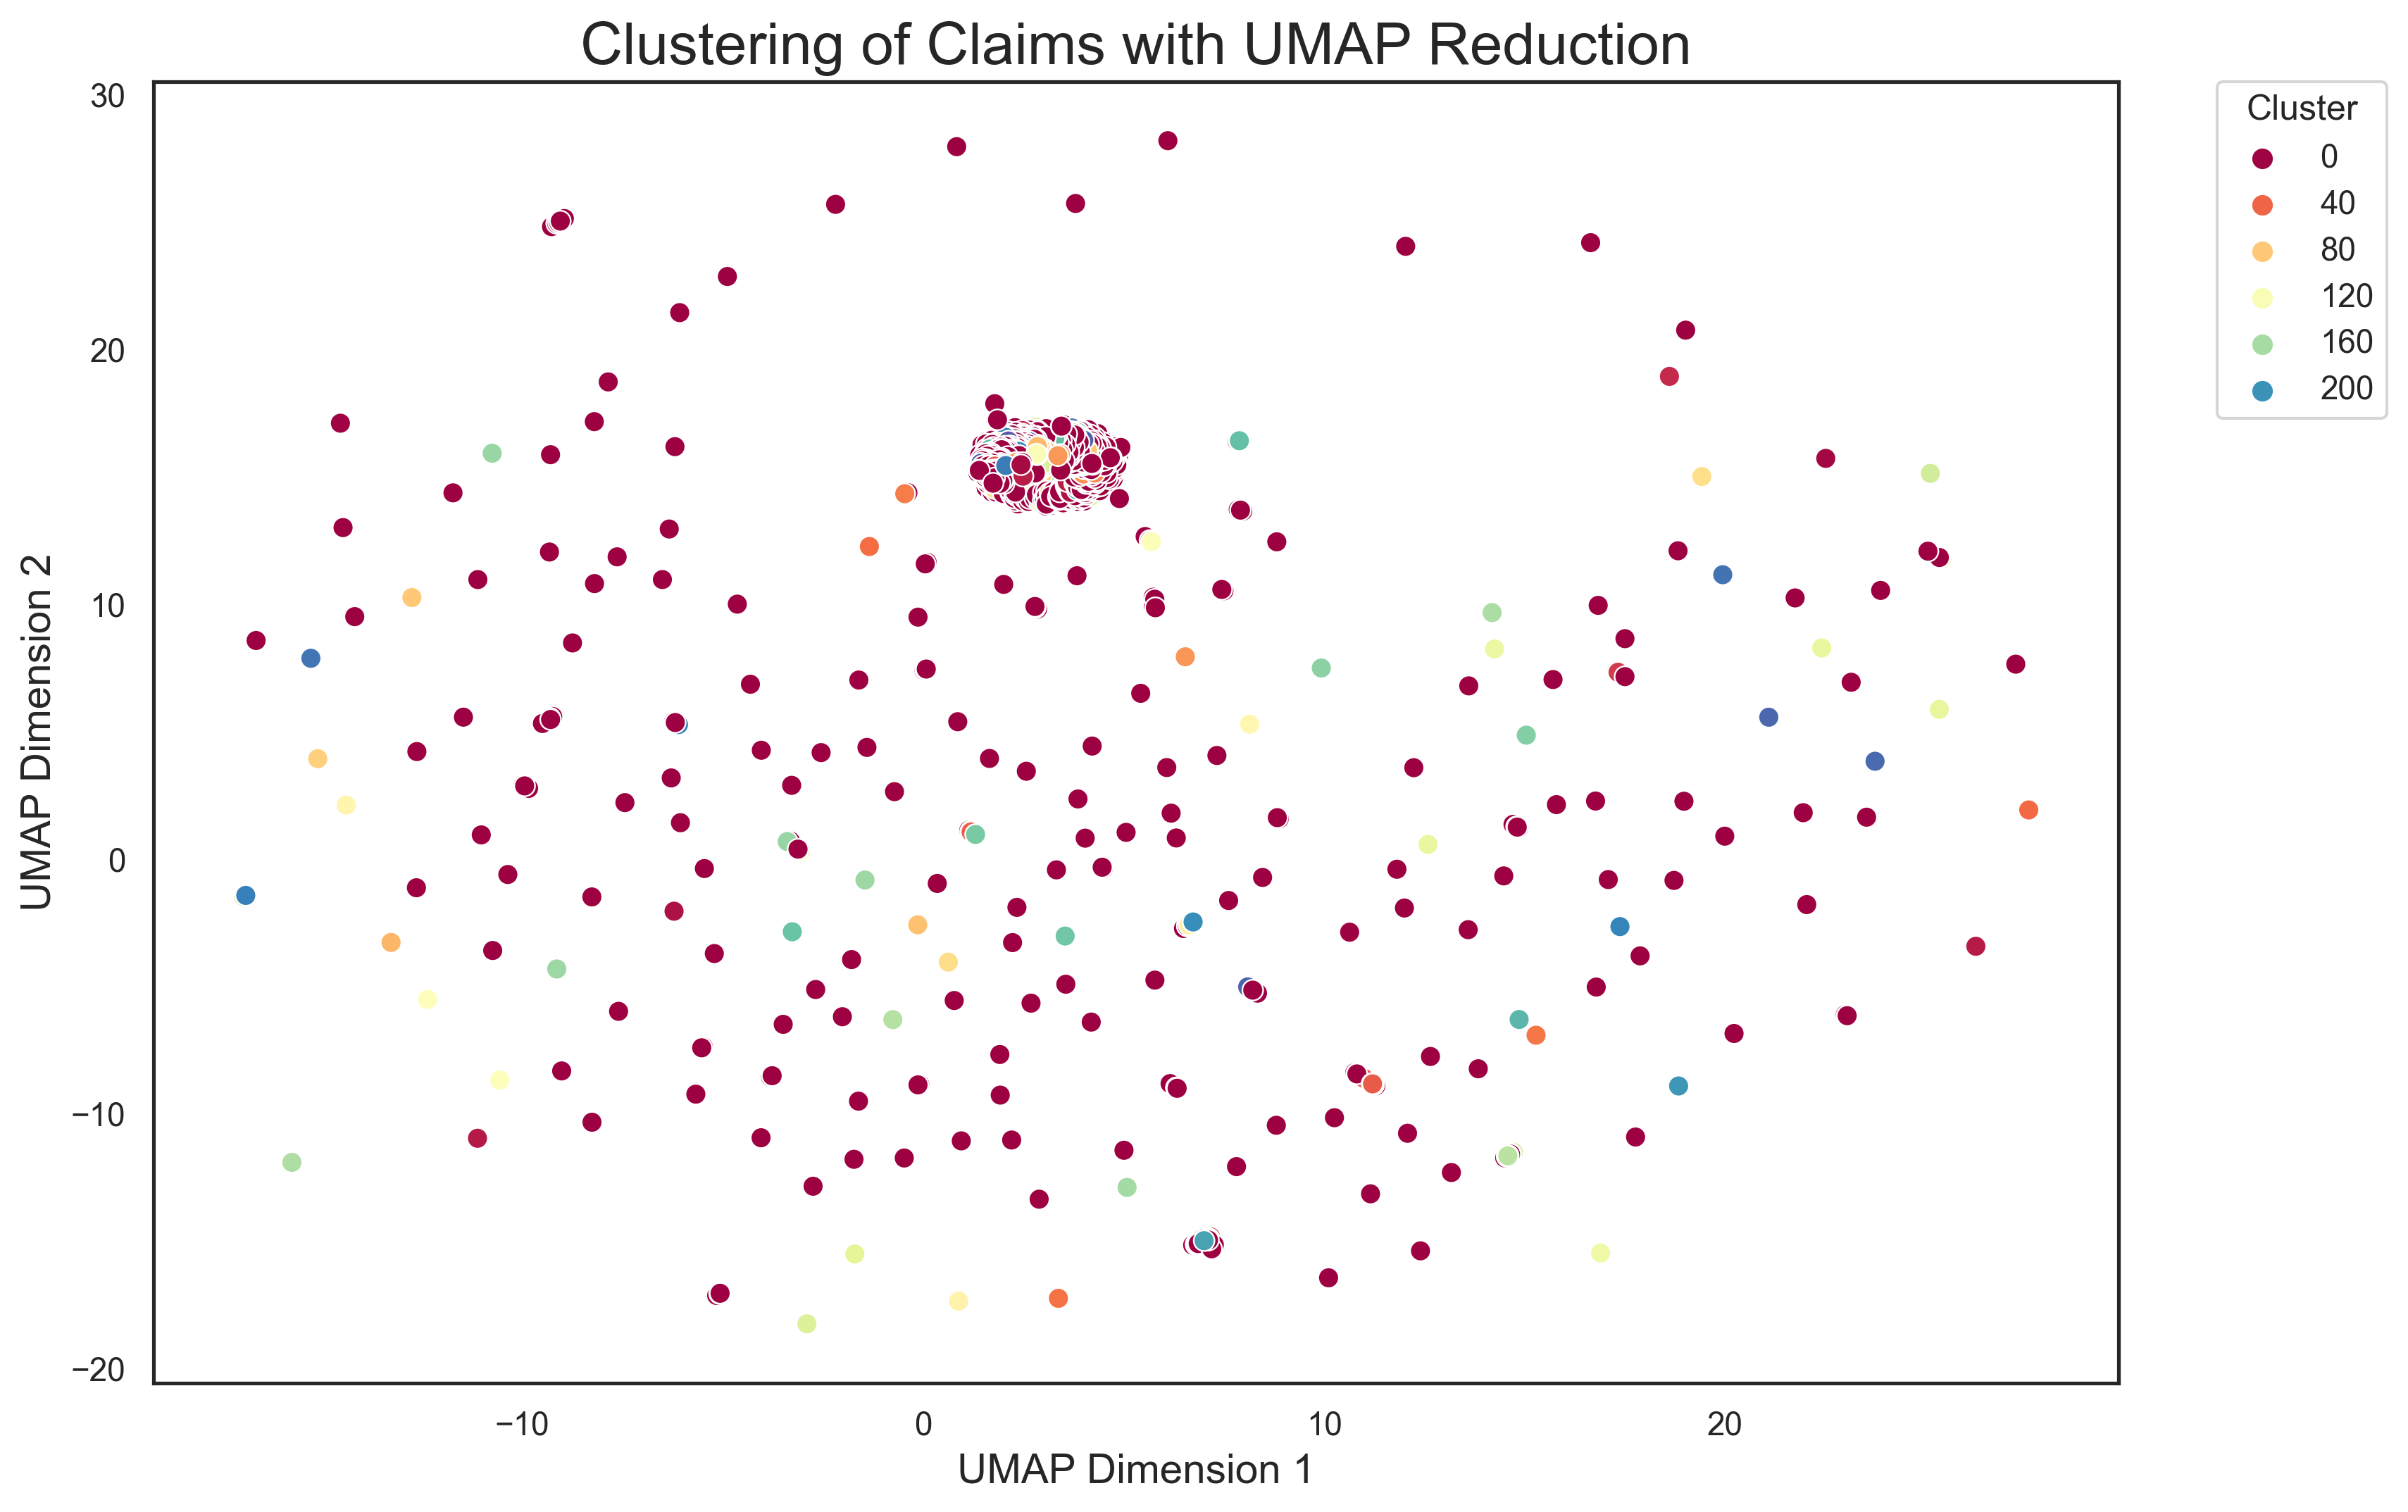

In [68]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_tfidf)

df['cluster_dbscan'] = dbscan_clusters

umap_model = UMAP(n_neighbors=15, n_components=2, random_state=42)
umap_embedding_2d = umap_model.fit_transform(X_tfidf)

sns.set(style='white')
plt.figure(figsize=(12, 8), dpi=300)
palette = sns.color_palette('Spectral', as_cmap=True)
sns.scatterplot(x=umap_embedding_2d[:, 0], y=umap_embedding_2d[:, 1], hue=df['cluster_dbscan'], palette=palette, s=50)
plt.title('Clustering of Claims with UMAP Reduction', fontsize=20)
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()